<a href="https://colab.research.google.com/github/Huyvubk/Math/blob/main/Transformation_maxtrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HW: 
Tìm hiểu về transformation matrix. Áp dụng cho ảnh 2D.
- Tìm matrix A có thể giúp cho xoay ảnh mọi góc $\theta$ trong range [-360, 360]
- Viết function xoay ảnh, nhận input là ảnh và góc xoay $\theta$. Trả về ouput là ảnh đã xoay theo góc $\theta$

Yêu cầu 1: Ảnh đã được xoay có kích thước bằng với ảnh input. Các vị trí pixel không có chứa thông tin ảnh gốc có giá trị bằng 0 (màu đen)

Yêu cầu 2 **(*)** (Optional): Ảnh đã được xoay có kích thước thay đổi kích thước phù hợp để đảm bảo các thông tin trong ảnh input không bị mất. Các vị trí pixel không có chứa thông tin ảnh gốc có giá trị bằng 0 (màu đen)

VD: rotate(img, 45)


VD output của Yêu cầu 1 khi xoay ảnh 45 độ 

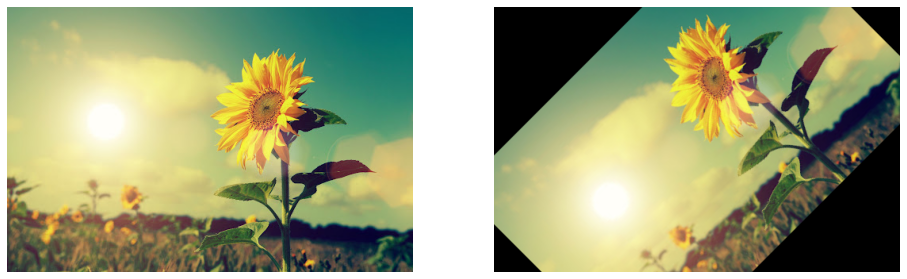

VD output của Yêu cầu 2 khi xoay ảnh 45 độ 

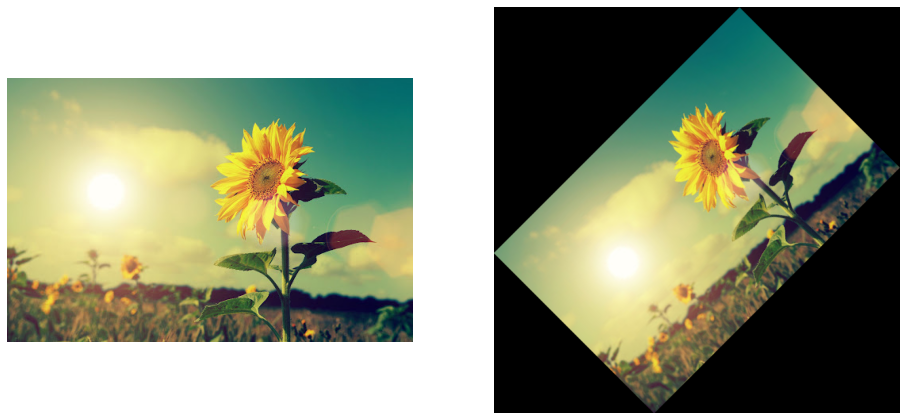

Rotation matraix A (2D)= 
$ \left[ {\begin{array}{cc}
    cos(\theta) & -sin(\theta) \\
    sin(\theta) & cos(\theta) \\
  \end{array} } \right]$

Trong đó $\theta$ là góc cần xoay ngược chiều kim đồng hồ 

**Yêu cầu 1: Ảnh đã được xoay có kích thước bằng với ảnh input. Các vị trí pixel không có chứa thông tin ảnh gốc có giá trị bằng 0 (màu đen)**

- **Step1:** Khởi tạo rotation matrix, new_iamge màu đen.
- **Step2:** Chọn pivot_point là điểm sẽ được cố định và ảnh xoay quanh điểm này
- **Step3:** Lấy từng vị trí trong từng ảnh input, convert theo tọa độ của pivot_point, dùng rotate matrix để transform từng vị trí để lấy được vị trí mới đã được xoay theo $\theta$. Convert vị trí từ tọa độ pivot_point sang tọa độ bình thường của ảnh input (dời gốc tọa độ). Vị trí nào là vị trí âm thì loại.  Các vị trí còn lại sẽ được đưa vào new_iamge và lấy giá trị của vị trí trước khi xoay trong ảnh input 

In [ ]:
!gdown --id "1fPWPrgXxDaxPsOie25IKfsQWqzL7HaIX"

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1fPWPrgXxDaxPsOie25IKfsQWqzL7HaIX
To: /content/sun.jpg
100% 45.6k/45.6k [00:00<00:00, 55.4MB/s]


In [ ]:
import numpy as np
import cv2
def change_angle_to_radius_unit(angle):
    angle_radius = angle * (np.pi/180)
    return angle_radius

def rotate(src_img,angle_of_rotation,pivot_point,shape_img):

    # Tạo rotation matrix A, transpose để xoay theo ngược chiều kim đồng hồ 
    rotation_mat = np.transpose(np.array([[np.cos(angle_of_rotation),-np.sin(angle_of_rotation)],
                            [np.sin(angle_of_rotation),np.cos(angle_of_rotation)]]))
    h,w = shape_img
    
    # pivot_point Điểm được coi là sẽ cố định và xoay ảnh quanh điểm đó
    pivot_point_x =  pivot_point[0]
    pivot_point_y = pivot_point[1]
    
    new_img = np.zeros(src_img.shape,dtype='u1') 

    for p_height in range(h): #h = number of row
        for p_width in range(w): #w = number of col
            # pivot_point xem như gốc tọa độ đưa các vị trí trong ảnh theo tọa độ này 
            xy_mat = np.array([[p_width-pivot_point_x],[p_height-pivot_point_y]])
            
            # Thực hiện xoay theo theta để lấy vị trí mới của 1 điểm ảnh 
            rotate_pos = np.dot(rotation_mat,xy_mat)
            
            # Đưa về tọa độ theo ảnh input 
            new_x = pivot_point_x + int(rotate_pos[0])
            new_y = pivot_point_y + int(rotate_pos[1])

            # vị trí nào bé hơn 0 sẽ bị loại 
            if (0<=new_x<=w-1) and (0<=new_y<=h-1): 
                # lấy giá trị trong ảnh input đưa vào vị trí mới 
                new_img[new_y,new_x] = src_img[p_height,p_width]

    return new_img

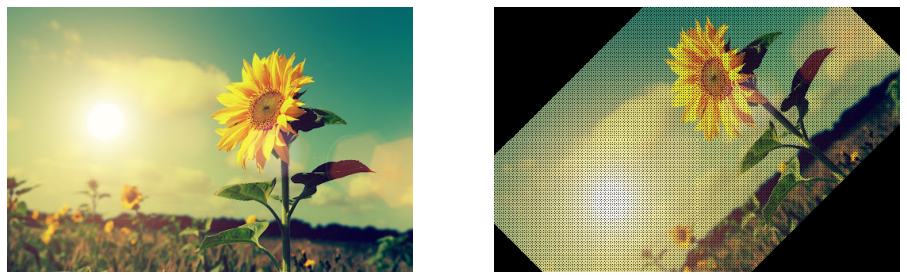

In [ ]:
import matplotlib.pyplot as plt
img = cv2.imread('/content/sun.jpg')
# rot_img = rotate(img,change_angle_to_radius_unit(-90),(0,0),img.shape[:2])
rot_img = rotate(img,change_angle_to_radius_unit(45),(img.shape[1]//2,img.shape[0]//2, ),img.shape[:2])
fig = plt.figure(figsize=(16,16))
fig.add_subplot(1,2,1)
plt.imshow(img[...,::-1])
plt.axis('off')

fig.add_subplot(1,2,2)
plt.imshow(rot_img[...,::-1])
plt.axis('off')

plt.show()

In [ ]:
# Sử dụng Opencv
def rotate_without_bound(image, angle):
    # Lấy rotation matrix 
    # center (pivot_point)
    (h, w) = image.shape[:2]
    (cX, cY) = (w // 2, h // 2)
    # lấy affine transformation matrix M
    M = cv2.getRotationMatrix2D((cX, cY), angle, 1.0)
    print(M)
 
    # xoay ảnh dự trên M
    return cv2.warpAffine(image, M, (w, h))

[[  0.70710678   0.70710678 -43.10616844]
 [ -0.70710678   0.70710678 229.93250353]]


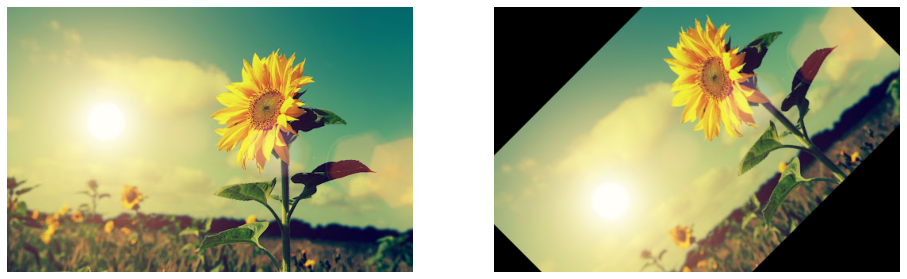

In [ ]:
import matplotlib.pyplot as plt
img = cv2.imread('/content/sun.jpg')
# rot_img = rotate(img,change_angle_to_radius_unit(-90),(0,0),img.shape[:2])
rot_img = rotate_without_bound(img, 45)
fig = plt.figure(figsize=(16,16))
fig.add_subplot(1,2,1)
plt.imshow(img[...,::-1])
plt.axis('off')

fig.add_subplot(1,2,2)
plt.imshow(rot_img[...,::-1])
plt.axis('off')

plt.show()

Three shears giúp giải quyết vấn đề aliasing 


$ \left[ {\begin{array}{cc}
    1 & -tan(\theta/2) \\
    0 & 1 \\
  \end{array} } \right]$
$ \left[ {\begin{array}{cc}
    1 & 0 \\
    sin(\theta) & 1 \\
  \end{array} } \right]$
$ \left[ {\begin{array}{cc}
    1 & -tan(\theta/2) \\
    0 & 1 \\
  \end{array} } \right]$
=
$ \left[ {\begin{array}{cc}
    cos(\theta) & -sin(\theta) \\
    sin(\theta) & cos(\theta) \\
  \end{array} } \right]$


$ \left[ {\begin{array}{cc}
    cos(-\theta) & -sin(-\theta) \\
    sin(-\theta) & cos(-\theta) \\
  \end{array} } \right]$
=
$ \left[ {\begin{array}{cc}
    cos(\theta) & sin(\theta) \\
    -sin(\theta) & cos(\theta) \\
  \end{array} } \right]$


In [ ]:
import numpy as np
import cv2
import math 
def change_angle_to_radius_unit(angle):
    angle_radius = angle * (np.pi/180)
    return angle_radius

def three_shears(angle_of_rotation, xy_mat):
    neg_angle_of_rotation = - angle_of_rotation
    shear_mat1 = np.array([[1, -np.tan(neg_angle_of_rotation/2)],
                           [0, 1]])
    shear_mat2 =np.array([[1, 0],
                           [np.sin(neg_angle_of_rotation), 1]])
    shear_mat3 = shear_mat1
    #shear 1
    new_xy = np.dot(shear_mat1, xy_mat) 
    new_xy = new_xy.astype(np.int64)
    # new_xy = np.array([int(new_xy[0]), int(new_xy[1])])
    #shear 2
    new_xy = np.dot(shear_mat2, new_xy) 
    new_xy = new_xy.astype(np.int64)
    # new_xy = np.array([int(new_xy[0]), int(new_xy[1])])
    #shear 3
    new_xy = np.dot(shear_mat3, new_xy) 
    new_xy = new_xy.astype(np.int64)
    # new_xy = np.array([int(new_xy[0]), int(new_xy[1])])
    return new_xy


def rotate(src_img,angle_of_rotation,pivot_point,shape_img):
    h,w = shape_img
    
    # pivot_point Điểm được coi là sẽ cố định và xoay ảnh quanh điểm đó
    pivot_point_x =  pivot_point[0]
    pivot_point_y = pivot_point[1]
    
    new_img = np.zeros(src_img.shape,dtype='u1') 

    for p_height in range(h): #h = number of row
        for p_width in range(w): #w = number of col
            # pivot_point xem như gốc tọa độ đưa các vị trí trong ảnh theo tọa độ này 
            xy_mat = np.array([[p_width-pivot_point_x],[p_height-pivot_point_y]])
            
            # Thực hiện xoay theo theta để lấy vị trí mới của 1 điểm ảnh 
            rotate_pos = three_shears(angle_of_rotation, xy_mat)
            
            
            # Đưa về tọa độ theo ảnh input 
            new_x = pivot_point_x + int(rotate_pos[0])
            new_y = pivot_point_y + int(rotate_pos[1])

            # vị trí nào bé hơn 0 sẽ bị loại 
            if (0<=new_x<=w-1) and (0<=new_y<=h-1): 
                # lấy giá trị trong ảnh input đưa vào vị trí mới 
                new_img[new_y,new_x] = src_img[p_height,p_width]

    return new_img

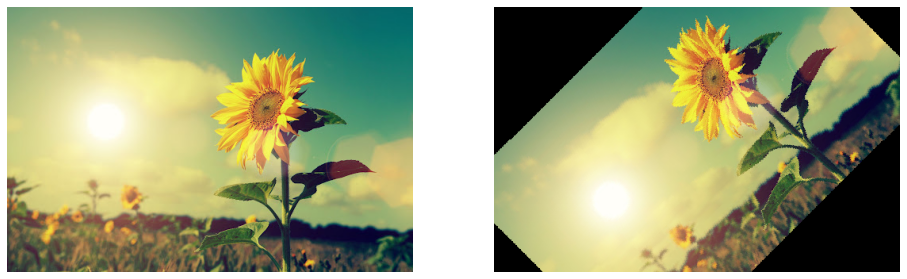

In [ ]:
import matplotlib.pyplot as plt
img = cv2.imread('/content/sun.jpg')
# rot_img = rotate(img,change_angle_to_radius_unit(-90),(0,0),img.shape[:2])
rot_img = rotate(img,change_angle_to_radius_unit(45),(img.shape[1]//2,img.shape[0]//2, ),img.shape[:2])
fig = plt.figure(figsize=(16,16))
fig.add_subplot(1,2,1)
plt.imshow(img[...,::-1])
plt.axis('off')

fig.add_subplot(1,2,2)
plt.imshow(rot_img[...,::-1])
plt.axis('off')

plt.show()

**Yêu cầu 2 (*)(Optional): Ảnh đã được xoay có kích thước thay đổi kích thước phù hợp để đảm bảo các thông tin trong ảnh input không bị mất. Các vị trí pixel không có chứa thông tin ảnh gốc có giá trị bằng 0 (màu đen)**

Opencv sử dụng affine transformation (2x3) 
$ M =  \left[ {\begin{array}{cc}
    \alpha & \beta  & (1-\alpha)*xCenter - \beta*yCenter\\
    -\beta & \alpha &  \beta*xCenter + (1-\alpha)*yCenter\\
  \end{array} } \right]$

$\alpha=scale*cos(\theta)$

$\beta=scale*sin(\theta)$

$\theta$ là góc xoay 

Trường hợp này scale = 1 (ảnh input được chứa trong ảnh xoay sẽ bằng size ảnh input (ảnh xoay có size > size input)). Và luôn xoay ở trung tâm ảnh (pivot_point là center của ảnh)

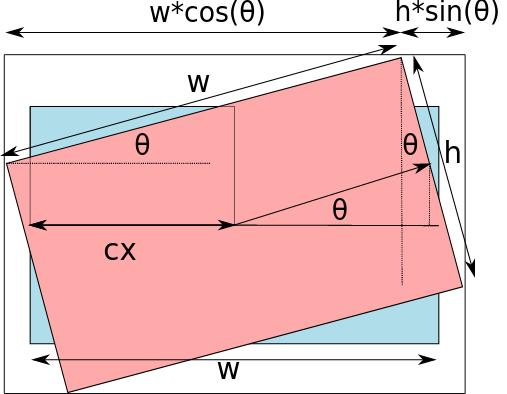

- Từ hình trên tính được ảnh output sau khi xoay sẽ có kích thước 

new_width $= h*sin(\theta)+w*cos(\theta)$

new_height $= h*cos(\theta)+w*sin(\theta)$

vì ảnh thay đổi kích thước nên M cũng thay đổi 

$
M =  \left[ {\begin{array}{cc}
    \alpha & \beta  & (1-\alpha)*xCenter - \beta*yCenter + (new\_width/2 - xCenter)\\
    -\beta & \alpha &  \beta*xCenter + (1-\alpha)*yCenter + (new\_height/2 - yCenter)\\
  \end{array} } \right]$

In [ ]:
def rotate_bound(image, angle):
    (h, w) = image.shape[:2]
    (cX, cY) = (w // 2, h // 2)

    # lấy affine transformation matrix M trong trường hợp xoay và bị cắt mất ảnh 
    M = cv2.getRotationMatrix2D((cX, cY), angle, 1.0)

    # Lấy các giá trị cần cho việc chỉnh sửa M để xoay không bị cắt ảnh 
    # lấy alpha và beta 
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])

    # Tính toán size của ảnh output sau khi xoay 
    nW = int((h * sin) + (w * cos))
    nH = int((h * cos) + (w * sin))

    # Thay đỏi M để xoay ko bị cắt mất ảnh 
    M[0, 2] += (nW / 2) - cX
    M[1, 2] += (nH / 2) - cY

    # xoay ảnh dựa trên M 
    return cv2.warpAffine(image, M, (nW, nH))

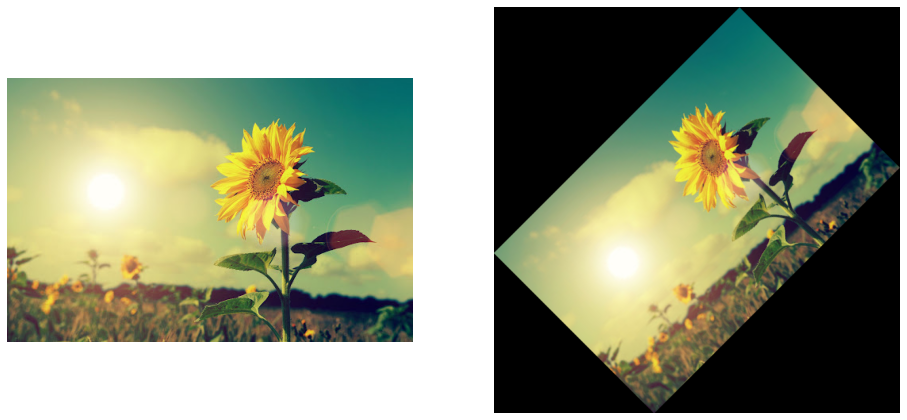

In [ ]:
import matplotlib.pyplot as plt
img = cv2.imread('/content/sun.jpg')
# rot_img = rotate(img,change_angle_to_radius_unit(-90),(0,0),img.shape[:2])
rot_img = rotate_bound(img, 45)
fig = plt.figure(figsize=(16,16))
fig.add_subplot(1,2,1)
plt.imshow(img[...,::-1])
plt.axis('off')

fig.add_subplot(1,2,2)
plt.imshow(rot_img[...,::-1])
plt.axis('off')

plt.show()